# Country Economic Conditions for Cargo Carriers (Unsupervised Machine Learning)

This report is written from the point of view of a data scientist preparing a report to the Head of Analytics for a logistics company. The company needs information on economic and financial conditions is different countries, including data on their international trade, to be aware of any situations that could affect business.

## Objective

The objective of this report is to determine what factors may be driving investment in a country. For our company, it is important to understand the drivers of global growth and investment, as it allows us to plan ahead for where there may be greater demand for cargo services in the future. We want to positions ourselves as the go-to logistics company globally. Positioning ourselves in growing trade hubs will serve the long-term strategic objectives of our global services.

## Data Summary

This dataset is taken from the International Monetary Fund (IMF) data bank. It lists country-level economic and financial statistics from all countries globally. This includes data such as gross domestic product (GDP), inflation, exports and imports, and government borrowing and revenue. The data is given in either US Dollars, or local currency depending on the country and year. Some variables, like inflation and unemployment, are given as percentages.

## Data Exploration

In [35]:
#Import required packages
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from scipy.cluster import hierarchy

In [2]:
#Import IMF World Economic Outlook Data from GitHub
WEO = pd.read_csv('https://raw.githubusercontent.com/jamiemfraser/machine_learning/main/WEOApr2021all.csv')
WEO=pd.DataFrame(WEO)
WEO.head()

,CountryCode,Country,Indicator,Notes,Units,Scale,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Afghanistan,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,NaN,NaN,1.481,1.348,...,4.510,4.754,2.205,0.291,1.353,0.768,1.623,1.434,2.237,2.209
1,AFG,Afghanistan,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,NaN,NaN,33.908,29.616,...,29.430,26.574,10.864,1.444,6.557,3.796,9.018,7.586,12.158,11.705
2,ALB,Albania,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,-0.246,-0.248,-0.443,-0.432,...,-1.351,-1.666,-1.257,-1.183,-1.430,-0.981,-0.898,-0.978,-1.024,-1.219
3,ALB,Albania,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,-7.070,-6.315,-10.179,-7.695,...,-11.321,-12.917,-10.202,-9.253,-10.797,-8.609,-7.572,-7.492,-6.758,-7.979
4,DZA,Algeria,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,9.142,7.060,4.359,8.808,...,12.157,19.802,12.290,0.835,-9.436,-27.290,-26.473,-22.081,-16.706,-17.150


In [3]:
#We are only interested in the most recent year for which data is available, 2019
WEO=WEO.drop(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis = 1)

#Reshape the data so each country is one observation
WEO=WEO.pivot_table(index=["Country"], columns='Indicator', values='2019').reset_index()
WEO.dropna(inplace=True)
WEO.head()

Indicator,Country,Current account balance,Employment,General government net lending/borrowing,General government revenue,General government total expenditure,"Gross domestic product per capita, constant prices","Gross domestic product per capita, current prices","Gross domestic product, constant prices","Inflation, average consumer prices",Total investment,Unemployment rate,Volume of exports of goods and services,Volume of imports of goods and services
8,Australia,4.9525,12.865,-40.2135,361.9895,402.2025,63894.200,61831.413333,987.3780,58.3800,22.544,5.150,3.313,-1.004
9,Austria,7.7475,4.337,1.6740,122.1255,120.4515,49263.665,51270.103333,187.7360,65.7460,25.471,4.525,2.943,2.448
15,Belgium,1.1055,4.978,-5.6135,144.3515,149.9650,45417.555,47458.873333,222.9465,54.5075,24.952,5.358,-0.079,-0.719
30,Canada,-18.8820,18.979,6.4965,500.1590,493.6625,52701.355,53147.910000,1052.0805,68.9660,22.988,5.733,1.267,0.346
39,Cyprus,-3.9415,0.416,0.8970,25.3930,24.4965,32609.890,32056.303333,12.3540,50.6670,19.687,7.075,-0.408,1.951


In [4]:
WEO.columns = ['Country', 'Current_account', 'Employment', 'Net_borrowing', 'Government_revenue', 'Government_expenditure', 'GDP_percap_constant', 'GDP_percap_current', 'GDP_constant', 'Inflation', 'Investment', 'Unemployment', 'Volume_exports', 'Volume_imports']
WEO.head()

,Country,Current_account,Employment,Net_borrowing,Government_revenue,Government_expenditure,GDP_percap_constant,GDP_percap_current,GDP_constant,Inflation,Investment,Unemployment,Volume_exports,Volume_imports
8,Australia,4.9525,12.865,-40.2135,361.9895,402.2025,63894.200,61831.413333,987.3780,58.3800,22.544,5.150,3.313,-1.004
9,Austria,7.7475,4.337,1.6740,122.1255,120.4515,49263.665,51270.103333,187.7360,65.7460,25.471,4.525,2.943,2.448
15,Belgium,1.1055,4.978,-5.6135,144.3515,149.9650,45417.555,47458.873333,222.9465,54.5075,24.952,5.358,-0.079,-0.719
30,Canada,-18.8820,18.979,6.4965,500.1590,493.6625,52701.355,53147.910000,1052.0805,68.9660,22.988,5.733,1.267,0.346
39,Cyprus,-3.9415,0.416,0.8970,25.3930,24.4965,32609.890,32056.303333,12.3540,50.6670,19.687,7.075,-0.408,1.951


In [5]:
WEO = WEO.drop(["Country", "Volume_exports", "Volume_imports", "GDP_percap_current", "Government_revenue", "Government_expenditure", "Employment", "Unemployment"], axis=1)
WEO.head()

,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
8,4.9525,-40.2135,63894.200,987.3780,58.3800,22.544
9,7.7475,1.6740,49263.665,187.7360,65.7460,25.471
15,1.1055,-5.6135,45417.555,222.9465,54.5075,24.952
30,-18.8820,6.4965,52701.355,1052.0805,68.9660,22.988
39,-3.9415,0.8970,32609.890,12.3540,50.6670,19.687


In [6]:
WEO.dtypes

Current_account        float64
Net_borrowing          float64
GDP_percap_constant    float64
GDP_constant           float64
Inflation              float64
Investment             float64
dtype: object

<AxesSubplot:>

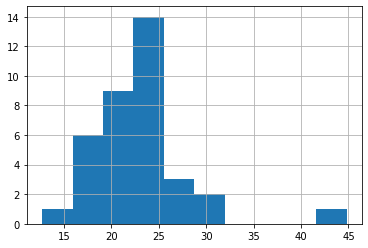

In [7]:
#Describe the distribution of target variable
WEO.Investment.hist()

## Models

The three models that I will use for this analysis are

1. K Means Clustering, with 10 clusters
2. K Means Clustering, with 5 clusters
3. Agglomerative Clustering model

### Model 1: K Means Clustering

In [8]:
kclusters = 10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(WEO)
kmeans.labels_[0:10]
label = kmeans.fit_predict(WEO)
print(label)

[0 0 0 0 6 4 7 6 0 6 0 6 7 3 9 9 6 2 1 6 6 9 6 0 0 8 6 9 6 6 6 4 9 5 6 0]


In [9]:
WEO.insert(0, 'ClusterLabels', kmeans.labels_)
WEO['ClusterLabels'] = WEO['ClusterLabels'].astype(int)
WEO.head()

,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
8,0,4.9525,-40.2135,63894.200,987.3780,58.3800,22.544
9,0,7.7475,1.6740,49263.665,187.7360,65.7460,25.471
15,0,1.1055,-5.6135,45417.555,222.9465,54.5075,24.952
30,0,-18.8820,6.4965,52701.355,1052.0805,68.9660,22.988
39,6,-3.9415,0.8970,32609.890,12.3540,50.6670,19.687


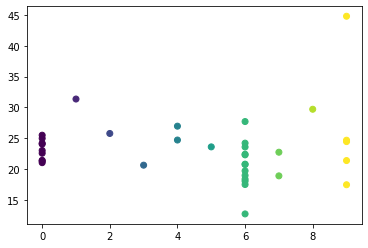

In [20]:
#Generate a visualization of the cluster labels value against the investment level. It seems that there is a large difference in the spread of investment levels between clusters.
plt.scatter(WEO.ClusterLabels, WEO.Investment, c=WEO.ClusterLabels)
plt.show()

#Some of the clusters only have one or two data points. So, I will redo the analysis tuning the hyperparameters

### Model 2: K Means Clustering, with 5 clusters

In [21]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(WEO)
kmeans.labels_[0:10]
label = kmeans.fit_predict(WEO)
print(label)

[0 0 0 0 0 4 4 0 0 0 0 0 4 2 0 0 0 3 1 0 0 0 0 0 0 4 0 0 0 0 0 4 0 4 0 0]


In [23]:
WEO.insert(0, 'ClusterLabels2', kmeans.labels_)
WEO['ClusterLabels2'] = WEO['ClusterLabels2'].astype(int)
WEO.head()

,ClusterLabels2,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
8,0,0,4.9525,-40.2135,63894.200,987.3780,58.3800,22.544
9,0,0,7.7475,1.6740,49263.665,187.7360,65.7460,25.471
15,0,0,1.1055,-5.6135,45417.555,222.9465,54.5075,24.952
30,0,0,-18.8820,6.4965,52701.355,1052.0805,68.9660,22.988
39,0,6,-3.9415,0.8970,32609.890,12.3540,50.6670,19.687


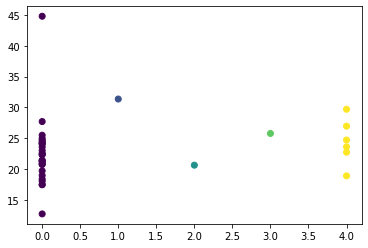

In [24]:
plt.scatter(WEO.ClusterLabels2, WEO.Investment, c=WEO.ClusterLabels2)
plt.show()

#This analysis shows that there are two main clusters that the majority of data points fall into.

In [25]:
##Examining the cluster member points in detail can reveal some of the similarities
#Describe cluster 0, the largest cluster
WEO.loc[WEO['ClusterLabels2'] == 0]

,ClusterLabels2,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
8,0,0,4.9525,-40.2135,63894.200,987.3780,58.3800,22.544
9,0,0,7.7475,1.6740,49263.665,187.7360,65.7460,25.471
15,0,0,1.1055,-5.6135,45417.555,222.9465,54.5075,24.952
30,0,0,-18.8820,6.4965,52701.355,1052.0805,68.9660,22.988
39,0,6,-3.9415,0.8970,32609.890,12.3540,50.6670,19.687
52,0,6,1.2930,0.0265,27800.180,14.8925,56.3820,27.692
56,0,0,-0.2845,-1.6350,45215.480,115.6855,52.3580,24.169
57,0,6,-9.3920,-37.8630,41718.800,1162.6640,53.1200,24.183
60,0,0,140.5865,26.9955,46422.565,1616.4475,53.4020,21.389
62,0,6,-3.4080,0.8600,23391.100,92.7315,60.9965,12.689


In [26]:
#Describe cluster 0, the largest cluster
WEO.loc[WEO['ClusterLabels2'] == 1]

,ClusterLabels2,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
86,1,1,31.65,3577.6865,1.789988e+07,924480.2195,52.618,31.348


In [27]:
#Describe cluster 0, the largest cluster
WEO.loc[WEO['ClusterLabels2'] == 2]

,ClusterLabels2,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
72,2,3,3.9735,-23.9415,3879362.445,1375.8345,84.474,20.606


In [28]:
#Describe cluster 0, the largest cluster
WEO.loc[WEO['ClusterLabels2'] == 3]

,ClusterLabels2,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
81,3,2,95.854,-8716.5525,2223190.09,277899.585,51.147,25.755


In [29]:
#Describe cluster 0, the largest cluster
WEO.loc[WEO['ClusterLabels2'] == 4]

,ClusterLabels2,ClusterLabels,Current_account,Net_borrowing,GDP_percap_constant,GDP_constant,Inflation,Investment
40,4,4,-0.5175,7.8205,267727.130,2634.4120,55.5950,26.941
43,4,7,19.9325,46.0305,214451.085,1078.3755,51.6310,22.710
70,4,7,13.9680,-8.7405,216000.540,1399.2255,56.4865,18.869
125,4,8,6.4195,102.3720,366160.260,1792.5110,61.2190,29.689
163,4,4,16.1365,13.1000,269823.260,2513.2150,54.2405,24.689
166,4,5,37.9025,-169.0215,432242.680,9598.8020,51.8310,23.577


In [ ]:
#Describe cluster 0, the largest cluster
WEO.loc[WEO['ClusterLabels'] == 5]

### Model 3: Agglomerative Clustering Model

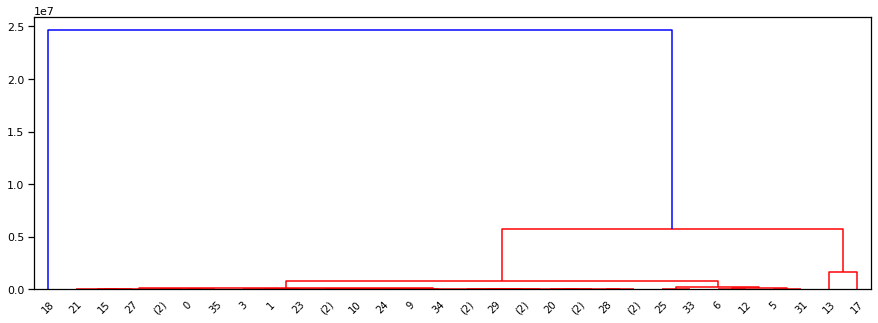

In [42]:
Z = hierarchy.linkage(WEO, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

hierarchy.set_link_color_palette(['red', 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

#This clustering algorithm also produces two main clusters, similar to the K Means model

### Recommendation

I would recommend using the K Means clustering model because although the Agglomerative Cluster model produces similar results, K Means is more efficient and easier to visualize the differences between the clusters.

## Key Findings

This analysis shows that there are two main clusters that describe the data in the Country Economic Conditions dataset. Visualization techniques show that despite a few outliers, there is low spread in the data points in these two clusters when plotted against investment, indicating that the characteristics of those countries produce similar levels of investment. This is an interesting finding and could help us to determine what factors may be correlated with certain investment levels.

## Next Steps

For the next steps, I would recommend a closer look at the data points that make up each of the two main clsuters. An examination of the similarities and differences between the two groups could provide further information on what characteristics lead to different investment levels.